,Modèle,MAE,RMSE,R2
0,LinearRegression,6.137280e-14,8.506308e-14,1.000000
3,KNN,1.630773e+00,2.058832e+00,0.999072
2,XGBoost,2.066108e+00,2.986837e+00,0.998047
1,RandomForest,1.601754e+00,3.088100e+00,0.997913


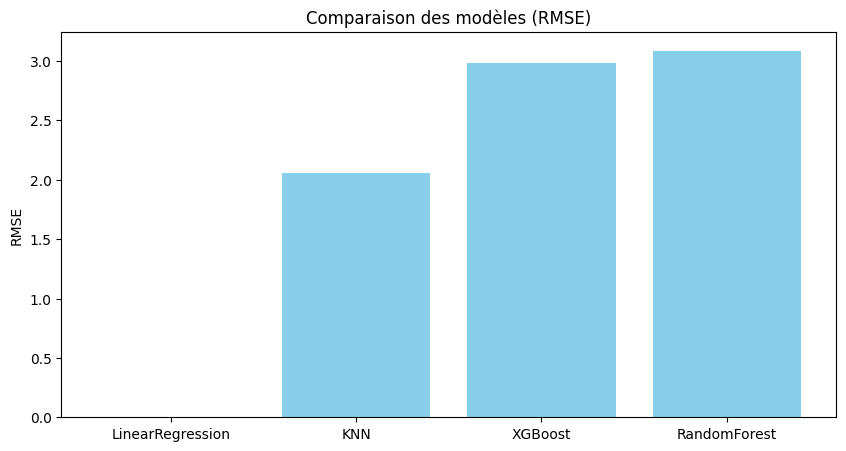

In [1]:
# 📦 Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# 📂 Chargement des données
df = pd.read_csv("../data/processed/cleaned_train.csv")

# 🧹 Séparation des features et cible
X = df.drop(columns=["RUL"])
y = df["RUL"]

# 🎲 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📊 Modèles à tester
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor()
}

results = []

# 🔁 Entraînement et évaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Modèle": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

# 📊 DataFrame résultats
df_results = pd.DataFrame(results).sort_values(by="RMSE")
display(df_results)

# 📈 Graphe comparatif
plt.figure(figsize=(10, 5))
plt.bar(df_results["Modèle"], df_results["RMSE"], color="skyblue")
plt.title("Comparaison des modèles (RMSE)")
plt.ylabel("RMSE")
plt.show()
